# Importation des packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Importation des données

Ajoutez un raccourci de ce dossier à votre google drive :

https://drive.google.com/drive/folders/1mx-CAzT10YKrmxHfYDP_1Oef7PVGUr7s?usp=sharing

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/data_classification_commentaires_toxiques/train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:

# Afficher les premières lignes
print("Aperçu des données :")
display(data.head())

# Afficher les informations générales
print("\nInformations sur le dataset :")
data.info()

# Vérifier les valeurs manquantes
print("\nValeurs manquantes :")
print(data.isnull().sum())

Aperçu des données :


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0



Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB

Valeurs manquantes :
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


# Etude du jeu de données

<ipython-input-6-8cf8b61aca9f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


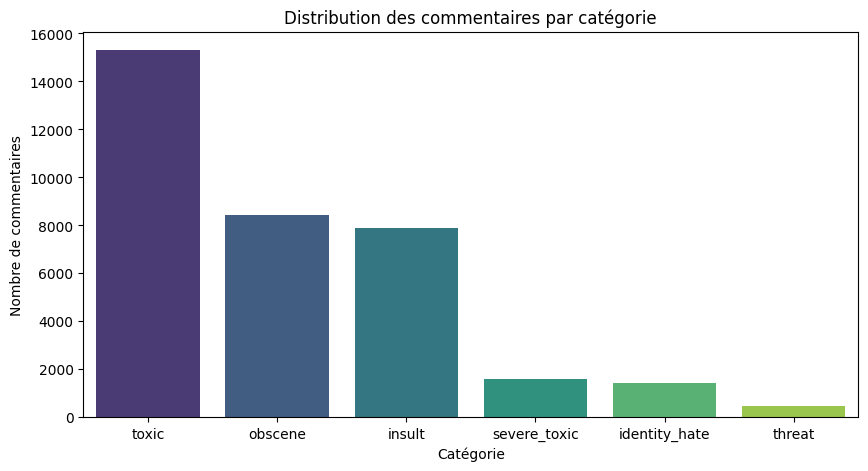

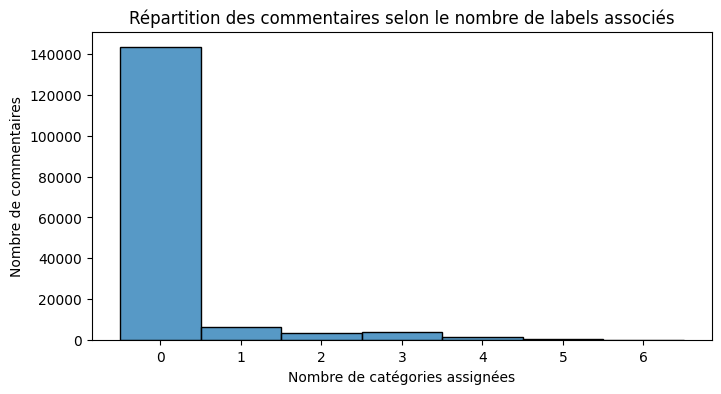

Exemples de commentaires toxiques :

1. COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK

2. Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?

Ask Sityush to clean up his behavior than issue me nonsensical warnings...

3. Bye! 

Don't look, come or think of comming back! Tosser.

4. You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!

2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!

3 - First and last warning, you fucking gay - I won'

In [6]:
# Your Code
import seaborn as sns

# Somme des labels pour voir la distribution
label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
label_counts = data[label_cols].sum().sort_values(ascending=False)

# Afficher un graphique des catégories
plt.figure(figsize=(10, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title("Distribution des commentaires par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de commentaires")
plt.show()

# Vérifier le nombre de commentaires avec plusieurs labels
data["total_labels"] = data[label_cols].sum(axis=1)
plt.figure(figsize=(8, 4))
sns.histplot(data["total_labels"], bins=6, discrete=True, kde=False)
plt.title("Répartition des commentaires selon le nombre de labels associés")
plt.xlabel("Nombre de catégories assignées")
plt.ylabel("Nombre de commentaires")
plt.show()

# Afficher quelques exemples de commentaires toxiques
print("Exemples de commentaires toxiques :\n")
for i in range(5):
    print(f"{i+1}. {data[data['total_labels'] > 0]['comment_text'].iloc[i]}\n")


# Préparation des données

In [10]:
# Your Code
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Télécharger les ressources nécessaires pour NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab resource

# Initialiser le lemmatizer et la liste des stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Fonction de prétraitement du texte
def preprocess_text(text):
    # Convertir en minuscules
    text = text.lower()

    # Supprimer la ponctuation et les caractères spéciaux
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    words = word_tokenize(text)

    # Supprimer les stopwords et lemmatisation
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Reformer la phrase
    return " ".join(words)

# Appliquer le prétraitement sur le dataset
data["clean_comment"] = data["comment_text"].apply(preprocess_text)

# Afficher quelques résultats
print("\nExemples après prétraitement :")
for i in range(5):
    print(f"{i+1}. {data['clean_comment'].iloc[i]}\n")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Exemples après prétraitement :
1. explanation edits made username hardcore metallica fan reverted werent vandalism closure gas voted new york doll fac please dont remove template talk page since im retired

2. daww match background colour im seemingly stuck thanks talk january utc

3. hey man im really trying edit war guy constantly removing relevant information talking edits instead talk page seems care formatting actual info

4. cant make real suggestion improvement wondered section statistic later subsection type accident think reference may need tidying exact format ie date format etc later noone else first preference formatting style reference want please let know appears backlog article review guess may delay reviewer turn listed relevant form eg wikipediagoodarticlenominationstransport

5. sir hero chance remember page thats



# Entraînement du modèle baseline

In [11]:
# Your Code
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Vectorisation avec TF-IDF
vectorizer = TfidfVectorizer(max_features=10000)  # On prend les 10 000 mots les plus fréquents
X = vectorizer.fit_transform(data["clean_comment"])

# Définir la variable cible (on peut commencer avec "toxic" uniquement)
y = data["toxic"]

# Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entraîner un modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28856
           1       0.91      0.62      0.74      3059

    accuracy                           0.96     31915
   macro avg       0.94      0.81      0.86     31915
weighted avg       0.96      0.96      0.95     31915



# Itération de la modélisation

In [ ]:
# Your Code